<a href="https://colab.research.google.com/github/spatidar2109/ML_Learing/blob/main/Gradient_booster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[2866   28]
 [  61   45]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2894
           1       0.62      0.42      0.50       106

    accuracy                           0.97      3000
   macro avg       0.80      0.71      0.74      3000
weighted avg       0.97      0.97      0.97      3000

0.9703333333333334


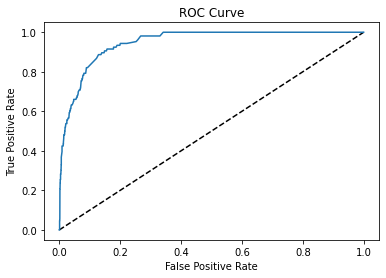

0.9477660351279811

In [1]:
import pandas as pd
import numpy as np

Default = pd.read_csv("/content/Default.csv")
dum_Default = pd.get_dummies(Default, drop_first=True)

X = dum_Default.iloc[:,[0,1,3]]
y = dum_Default.iloc[:,2]

# Import the necessary modules
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=2018)

clf = GradientBoostingClassifier(random_state=1200)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

################ROC#############################

# Import necessary modules
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

In [ ]:
###############Regressor################


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/Housing (2).csv")
dum_df = pd.get_dummies(df.iloc[:,1:11], drop_first=True)

from sklearn.model_selection import train_test_split 

X = dum_df
y = df.iloc[:,1]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=2018)

from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(random_state=1200)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

#def mean_absolute_percentage_error(y_true, y_pred): 
#    y_true, y_pred = np.array(y_true), np.array(y_pred)
#    return np.mean(np.abs((y_true - y_pred) / y_true))
#
#print(mean_absolute_percentage_error(y_test,y_pred))

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

941.279270626362
16.84684664029211
0.9997260712448212


In [ ]:
####################Hist_Gradient################

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/train.csv",
                 parse_dates=['datetime'])

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday']=df['datetime'].dt.weekday

df['season'] = df['season'].astype('category')
df['weather'] = df['weather'].astype('category')

In [6]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [7]:
df.drop(columns=['datetime','casual', 'registered'],inplace=True)

In [8]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


In [9]:
dum_df = pd.get_dummies(df, drop_first=True)

X = dum_df.drop('count',axis=1)
y = dum_df['count']

from sklearn.model_selection import train_test_split 

from sklearn.metrics import mean_squared_log_error

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2018)

#############################XG Boost#######################################
from xgboost import XGBRegressor
clf = XGBRegressor(random_state=2019)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred[y_pred<0] = 0
print("Root Mean Squared Log Error  = %6.4f" % np.sqrt(mean_squared_log_error(y_test, y_pred)))

[14:23:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Log Error  = 0.7917


In [10]:
#########################Histogram-based Gradient Boosting#####################
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

clf = HistGradientBoostingRegressor(random_state=2019)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred[y_pred<0] = 0
print("Root Mean Squared Log Error  = %6.4f" % np.sqrt(mean_squared_log_error(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


Root Mean Squared Log Error  = 0.4278
